                                                                          MODULE 1
                                                              Data Preprocessing and Visualization

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from lightgbm import LGBMClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler,LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam


from sklearn.metrics import accuracy_score, classification_report
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import  OneHotEncoder


In [2]:
pip install --upgrade tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Obtaining dependency information for tensorboard<2.16,>=2.15 from https://files.pythonhosted.org/packages/6e/0c/1059a6682cf2cc1fcc0d5327837b5672fe4f5574255fa5430d0a8ceb75e9/tensorboard-2.15.1-py3-none-any.whl.metadata
  Using cached tensorboard-2.15.1-py3-none-any.whl.metadata (1.7 kB)
  Obtaining dependency information for tensorflow-estimator<2.16,>=2.15.0 from https://files.pythonho

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^

   -- ------------------------------------- 21.0/300.9 MB 11.3 kB/s eta 6:52:52
   -- ------------------------------------- 21.0/300.9 MB 11.3 kB/s eta 6:52:52
   -- ------------------------------------- 21.0/300.9 MB 11.3 kB/s eta 6:52:52
   -- ------------------------------------- 21.0/300.9 MB 11.3 kB/s eta 6:52:52
   -- ------------------------------------- 21.0/300.9 MB 11.3 kB/s eta 6:52:52
   -- ------------------------------------- 21.0/300.9 MB 11.3 kB/s eta 6:52:52
   -- ------------------------------------- 21.0/300.9 MB 11.0 kB/s eta 7:04:00
   -- ------------------------------------- 21.0/300.9 MB 11.0 kB/s eta 7:04:00
   -- ------------------------------------- 21.0/300.9 MB 11.0 kB/s eta 7:04:00
   -- ------------------------------------- 21.0/300.9 MB 11.0 kB/s eta 7:04:00
   -- ------------------------------------- 21.0/300.9 MB 11.0 kB/s eta 7:04:00
   -- ------------------------------------- 21.0/300.9 MB 11.0 kB/s eta 7:04:00
   -- ----------------------------------

In [3]:
pip show tensorflow


Name: tensorflow
Version: 2.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


                                                                    IMPORT THE CSV FILE 

In [4]:
df= pd.read_csv("C:\\Users\\LAU\\Desktop\\new proj\\base_data_new_25_new.csv")

In [5]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
InvoiceNo           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
date                0
Recency             0
Frequency           0
Total_cost          0
Monetary            0
receny_score        0
frequency_score     0
monetary_score      0
customer_segment    0
dtype: int64


In [6]:
df.dropna(inplace=True)

In [7]:
#duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)
df = df.drop_duplicates()

Duplicate Rows:
        InvoiceNo                        Description  Quantity  \
587        536412               FELTCRAFT DOLL MOLLY         1   
3407       536796  AIRLINE BAG VINTAGE JET SET WHITE         2   
3410       536796                          SPACE OWL         1   
3436       536796          PACK OF 6 BIRDY GIFT TAGS         1   
3441       536796           PACK OF 12 SKULL TISSUES         1   
...           ...                                ...       ...   
406595     581538        BLACK PIRATE TREASURE CHEST         1   
406609     581538     BOX OF 6 MINI VINTAGE CRACKERS         1   
406612     581538             REVOLVER WOODEN RULER          1   
406619     581538                       WICKER STAR          1   
406621     581538       JUMBO BAG VINTAGE CHRISTMAS          1   

             InvoiceDate  UnitPrice  CustomerID         Country        date  \
587     12-01-2010 11:49       2.95       17920  United Kingdom  2010-12-01   
3407    12-02-2010 15:46       4.

                                                                  CLASS IMBALANCE AND EQUALIZING 

<Axes: ylabel='Type'>

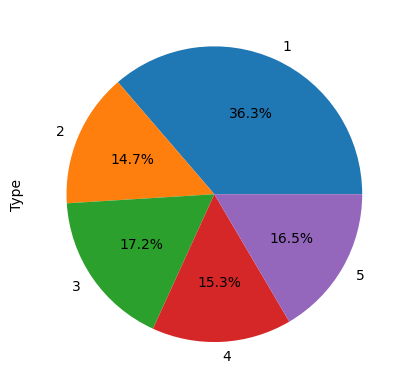

In [8]:
df.groupby('customer_segment').size().plot(kind='pie',
                                       y = "Dataset",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [9]:
new_customer = df[df["customer_segment"] == 3]
need_attention = df[df["customer_segment"] == 4]
at_risk = df[df["customer_segment"] == 5]
regular=df[df["customer_segment"] == 1]
promising_customer=df[df["customer_segment"] == 2]
print(new_customer.shape)
print(need_attention.shape)
print(at_risk.shape)
print(regular.shape)
print(promising_customer.shape)

(69086, 16)
(61361, 16)
(66418, 16)
(145823, 16)
(58941, 16)


In [10]:
from sklearn.utils import resample
new_downsample = resample(new_customer,
             replace=True,
             n_samples=len(promising_customer),
             random_state=42)

print(new_downsample.shape)

(58941, 16)


In [11]:
need_downsample = resample(need_attention,
             replace=True,
             n_samples=len(promising_customer),
             random_state=42)

print(need_downsample.shape)

(58941, 16)


In [12]:
risk_downsample = resample(at_risk,
             replace=True,
             n_samples=len(promising_customer),
             random_state=42)

print(risk_downsample.shape)

(58941, 16)


In [13]:
regular_downsample= resample(regular,
             replace=True,
             n_samples=len(promising_customer),
             random_state=42)

print(regular_downsample.shape)

(58941, 16)


customer_segment
3    58941
4    58941
5    58941
1    58941
2    58941
Name: count, dtype: int64


<Axes: ylabel='Type'>

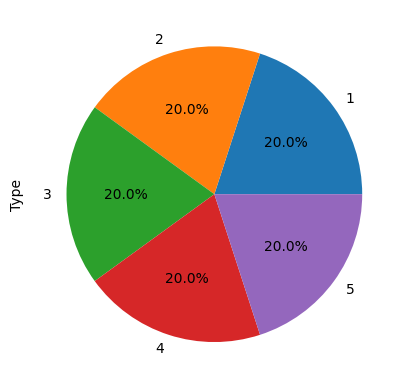

In [14]:
df_downsampled = pd.concat([new_downsample,need_downsample,risk_downsample,regular_downsample,promising_customer])

print(df_downsampled["customer_segment"].value_counts())

df_downsampled.groupby('customer_segment').size().plot(kind='pie',
                                       y = "Dataset",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [15]:
df_downsampled.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Recency,Frequency,Total_cost,Monetary,receny_score,frequency_score,monetary_score,customer_segment
278956,569638,HEART OF WICKER LARGE,6,10-05-2011 12:15,2.95,16140,United Kingdom,2011-10-05,94,4,17.70,704,4,2,1,3
246562,566564,TRAVEL CARD WALLET I LOVE LONDON,24,9/13/2011 12:26,0.42,15522,United Kingdom,2011-09-13,94,2,10.08,399,4,1,1,3
367850,577769,VINTAGE SNAP CARDS,12,11/21/2011 15:27,0.85,16379,United Kingdom,2011-11-21,94,5,10.20,2132,5,2,3,3
259043,567873,PLAYING CARDS KEEP CALM & CARRY ON,12,9/22/2011 14:25,1.25,13055,United Kingdom,2011-09-22,94,4,15.00,1202,4,2,2,3
326667,574063,STRAWBERRY FAIRY CAKE TEAPOT,1,11-02-2011 14:31,4.95,13271,United Kingdom,2011-11-02,94,2,4.95,178,5,1,1,3


                                                            FEATURE SELECTION AND TRAIN TEST SPLIT 

In [16]:
X = df_downsampled[['InvoiceNo','Quantity','UnitPrice','CustomerID','Recency','Frequency',	'Monetary','receny_score','frequency_score','monetary_score']]

Y= df_downsampled['customer_segment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
print(X_train.sample(5))

        InvoiceNo  Quantity  UnitPrice  CustomerID  Recency  Frequency  \
348611     576051        12       4.95       14911       94        248   
146808     554872        -2       0.85       16341       94          6   
344289     575706         3       1.65       14713       94         12   
369814     578019         1       2.10       17360       94          3   
266959     568568        24       1.25       14412       94          3   

        Monetary  receny_score  frequency_score  monetary_score  
348611    132573             5                5               5  
146808      1959             2                2               3  
344289      2664             5                4               3  
369814       586             5                2               1  
266959       761             4                1               1  


In [18]:
print(X_test.sample(5))

        InvoiceNo  Quantity  UnitPrice  CustomerID  Recency  Frequency  \
85197      547069         2       0.85       16710       94         10   
208261     562351        10       2.08       16626       94         20   
396055     580630        20       2.08       12913       94          5   
382448     579134        20       1.65       13115       94         14   
75466      545978         3       1.45       13975       94          7   

        Monetary  receny_score  frequency_score  monetary_score  
85197       2483             2                3               3  
208261      4380             3                4               4  
396055      2484             5                2               3  
382448      2206             5                4               3  
75466       2503             1                3               3  


In [19]:
print(Y_train.sample(5))

9721      4
280536    3
399031    2
150275    5
77499     5
Name: customer_segment, dtype: int64


In [20]:
print(Y_test.sample(5))

271130    3
238603    1
193604    1
58660     1
290129    1
Name: customer_segment, dtype: int64


In [21]:
print(df.shape[1])
num_classes=df.shape[1]

16


In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
print(X_train_scaled.shape)

(235764, 10)


                                                                            MODULE 2 

                                                                         KERAS CLASSIFIER 

In [24]:
from tensorflow.keras.layers import Dropout, ActivityRegularization
from tensorflow.keras.layers import BatchNormalization
#dense_1 = Dense(units=500, activation='relu')(input_layer)
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
input_layer = Input(shape=(X_train_scaled.shape[1],))
#dense_1 = Dense(units=500, activation='relu', kernel_regularizer='l2')(input_layer)
from tensorflow.keras.constraints import max_norm
dense_1 = Dense(units=500, activation='relu', kernel_constraint=max_norm(3.))(input_layer)
batch_norm_1 = BatchNormalization()(dense_1)
dropout_1 = Dropout(0.5)(batch_norm_1)
dense_2 = Dense(units=250, activation='relu')(dropout_1)
dense_3 = Dense(units=300, activation='relu')(dense_2)
batch_norm_3 = BatchNormalization()(dense_3)
dropout_3 = Dropout(0.2)(batch_norm_3)
dense_4 = Dense(units=300, activation='tanh')(dropout_3)
dense_5 = Dense(units=150, activation='relu',kernel_constraint=max_norm(3.))(dense_4)
batch_norm_5 = BatchNormalization()(dense_5)
dropout_5 = Dropout(0.5)(batch_norm_5)
output_layer = Dense(units=num_classes, activation='softmax')(dropout_5)

In [25]:
model = Model(inputs=input_layer, outputs=output_layer)

In [26]:
optimizer = Adam(learning_rate=0.000001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
print(type(Y_train))
print(Y_train.dtype)

<class 'pandas.core.series.Series'>
int64


In [28]:
#model.fit(X_train_scaled,Y_train, epochs=10, batch_size=32)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train_scaled, Y_train, epochs=7, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/7
5895/5895 [==============================] - 67s 11ms/step - loss: 2.7171 - accuracy: 0.2825 - val_loss: 0.8740 - val_accuracy: 0.7896
Epoch 2/7
5895/5895 [==============================] - 63s 11ms/step - loss: 1.4273 - accuracy: 0.6322 - val_loss: 0.5351 - val_accuracy: 0.8569
Epoch 3/7
5895/5895 [==============================] - 63s 11ms/step - loss: 1.0720 - accuracy: 0.7469 - val_loss: 0.4021 - val_accuracy: 0.8953
Epoch 4/7
5895/5895 [==============================] - 62s 10ms/step - loss: 0.9186 - accuracy: 0.7909 - val_loss: 0.3404 - val_accuracy: 0.9024
Epoch 5/7
5895/5895 [==============================] - 62s 11ms/step - loss: 0.8239 - accuracy: 0.8121 - val_loss: 0.2857 - val_accuracy: 0.9096
Epoch 6/7
5895/5895 [==============================] - 63s 11ms/step - loss: 0.7552 - accuracy: 0.8251 - val_loss: 0.2160 - val_accuracy: 0.9282
Epoch 7/7
5895/5895 [==============================] - 63s 11ms/step - loss: 0.6870 - accuracy: 0.8364 - val_loss: 0.1796 - val_ac

In [29]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred, axis=1)

#confusion matrix
conf_mat = confusion_matrix(Y_test, y_pred_labels)

print(conf_mat)


1842/1842 [==============================] - 5s 3ms/step
[[ 8717   647  1133   789   540]
 [   72 11763    21     0     0]
 [    0     0 11721     0     0]
 [    0     0     3 11838     0]
 [    4    52     2    32 11607]]


In [31]:
accuracy = np.trace(conf_mat) / np.sum(conf_mat)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9440966390118932


                                                                        SVM CLASSIFIER 

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

svm_classifier = SVC(kernel='rbf')  # You can choose different kernels like 'rbf' for non-linear data
# Train the model
svm_classifier.fit(X_train, Y_train)
#predictions
y_pred = svm_classifier.predict(X_test)
# Evaluate 
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

target_names = [str(i) for i in range(5)]
print(classification_report(Y_test, y_pred, target_names=target_names))


Accuracy: 0.7642048828489506
              precision    recall  f1-score   support

           0       0.64      0.55      0.59     11826
           1       0.91      0.72      0.80     11856
           2       0.71      0.95      0.82     11721
           3       0.72      0.91      0.81     11841
           4       0.90      0.70      0.79     11697

    accuracy                           0.76     58941
   macro avg       0.78      0.76      0.76     58941
weighted avg       0.78      0.76      0.76     58941



                                                                             MODULE 3

                                                                    STACKING AND META LEARNER 

In [36]:
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_new_train, X_val, Y_new_train, Y_val = train_test_split(
    X_train_scaled, Y_train, test_size=0.2, random_state=42
)

y_pred_keras_val = model.predict(X_val)

y_pred_svm_val = svm_classifier.predict(X_val)

stacked_X_val = np.column_stack((y_pred_keras_val, y_pred_svm_val))

# logistic regression meta-model
meta_model = LogisticRegression(solver='liblinear', max_iter=1000)
meta_model.fit(stacked_X_val, Y_val)

y_pred_keras_test = model.predict(X_test_scaled)
y_pred_svm_test = svm_classifier.predict(X_test_scaled)

stacked_X_test = np.column_stack((y_pred_keras_test, y_pred_svm_test))

stacked_predictions_test = meta_model.predict(stacked_X_test)

stacked_accuracy_test = accuracy_score(Y_test, stacked_predictions_test)
print(f"Stacked Model Accuracy on Test Set: {stacked_accuracy_test}")


1474/1474 [==============================] - 4s 3ms/step


c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


1842/1842 [==============================] - 4s 2ms/step


c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Stacked Model Accuracy on Test Set: 0.9818462530326937


In [37]:
print(y_pred_keras_val)

[[2.1202848e-05 1.5726991e-06 1.6955582e-07 ... 9.1345764e-06
  6.3218358e-06 4.4767048e-06]
 [2.3625211e-05 6.0200550e-06 5.7316237e-07 ... 4.1187777e-05
  9.9241486e-05 1.4152259e-04]
 [8.5513646e-05 1.7444084e-04 6.5207746e-06 ... 2.4434503e-05
  5.7703659e-05 1.0795267e-04]
 ...
 [3.2565196e-05 8.2595951e-05 9.9906999e-01 ... 5.9606005e-05
  2.4766336e-05 1.3194454e-04]
 [2.0776190e-04 2.8581855e-05 9.8473993e-07 ... 1.8833861e-04
  7.0682370e-05 9.0362839e-05]
 [8.4085495e-04 7.0443012e-02 5.0943654e-05 ... 5.4451817e-04
  5.0963095e-04 3.9068199e-04]]


In [38]:
print(X_val)

[[ 1.02797897 -0.03620691 -0.02424861 ...  1.34734485 -1.35286852
  -0.01373564]
 [-1.60304406  0.10095885 -0.01124699 ... -1.3346778  -0.68238507
  -0.69809104]
 [ 1.40511281  0.00248087 -0.0313404  ...  1.34734485 -0.68238507
  -0.01373564]
 ...
 [ 1.15965695  0.00248087 -0.02424861 ...  1.34734485  0.65858183
   0.67061976]
 [-1.57449088 -0.02917277 -0.00651913 ... -1.3346778   0.65858183
   0.67061976]
 [-0.2524933  -0.03620691 -0.0313404  ... -0.66417214  0.65858183
  -0.01373564]]


In [39]:
print(y_pred_svm_val)

[4 4 4 ... 4 4 4]


In [40]:
print(y_pred_keras_test)


[[6.8627666e-03 2.1339688e-01 4.8878435e-05 ... 6.4981715e-03
  1.5629575e-02 2.0092200e-02]
 [4.8333924e-04 9.4751263e-01 3.2459640e-05 ... 9.9007925e-04
  1.9834766e-03 1.2896847e-03]
 [1.6914173e-03 9.5720559e-01 3.6673548e-05 ... 9.7105611e-04
  3.1074402e-03 1.7842656e-03]
 ...
 [2.5627972e-04 3.9105988e-04 6.8402181e-07 ... 1.4374180e-04
  6.3167572e-05 1.3687908e-04]
 [2.8982400e-05 3.0642706e-05 3.2526668e-07 ... 2.0757041e-05
  2.4762432e-05 1.0144727e-04]
 [2.5990307e-06 5.6819181e-06 9.9977356e-01 ... 1.4458743e-05
  2.9785845e-06 8.6538566e-06]]


In [41]:
y_pred_labels_keras = np.argmax(y_pred_keras_test, axis=1)
print(y_pred_labels_keras)

[4 1 1 ... 5 4 2]


In [42]:
print(y_pred_svm_test)


[4 4 4 ... 4 4 4]


In [43]:
y_pred_labels_svm = np.sign(y_pred_svm_test)
print(y_pred_labels_svm)

[1 1 1 ... 1 1 1]


In [44]:
print(stacked_X_val)


[[2.12028481e-05 1.57269915e-06 1.69555818e-07 ... 6.32183583e-06
  4.47670482e-06 4.00000000e+00]
 [2.36252108e-05 6.02005503e-06 5.73162367e-07 ... 9.92414862e-05
  1.41522585e-04 4.00000000e+00]
 [8.55136459e-05 1.74440836e-04 6.52077460e-06 ... 5.77036590e-05
  1.07952670e-04 4.00000000e+00]
 ...
 [3.25651963e-05 8.25959505e-05 9.99069989e-01 ... 2.47663356e-05
  1.31944544e-04 4.00000000e+00]
 [2.07761899e-04 2.85818551e-05 9.84739927e-07 ... 7.06823703e-05
  9.03628388e-05 4.00000000e+00]
 [8.40854947e-04 7.04430118e-02 5.09436541e-05 ... 5.09630947e-04
  3.90681991e-04 4.00000000e+00]]


In [45]:
print(stacked_X_test)

[[6.86276658e-03 2.13396877e-01 4.88784353e-05 ... 1.56295747e-02
  2.00922005e-02 4.00000000e+00]
 [4.83339245e-04 9.47512627e-01 3.24596404e-05 ... 1.98347657e-03
  1.28968467e-03 4.00000000e+00]
 [1.69141730e-03 9.57205594e-01 3.66735476e-05 ... 3.10744019e-03
  1.78426562e-03 4.00000000e+00]
 ...
 [2.56279716e-04 3.91059875e-04 6.84021813e-07 ... 6.31675721e-05
  1.36879084e-04 4.00000000e+00]
 [2.89824002e-05 3.06427064e-05 3.25266683e-07 ... 2.47624321e-05
  1.01447273e-04 4.00000000e+00]
 [2.59903072e-06 5.68191808e-06 9.99773562e-01 ... 2.97858446e-06
  8.65385664e-06 4.00000000e+00]]


In [46]:
print("Actual Labels (Y_test):")
print(np.array(Y_test))


Actual Labels (Y_test):
[1 1 1 ... 5 4 2]


In [47]:
print("Predicted Labels (stacked_predictions_test):")
print(stacked_predictions_test)

Predicted Labels (stacked_predictions_test):
[1 1 1 ... 5 4 2]


                                                                            MODULE 4

MODULE 5--> PREDICTIVE MODELLING 

c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be g

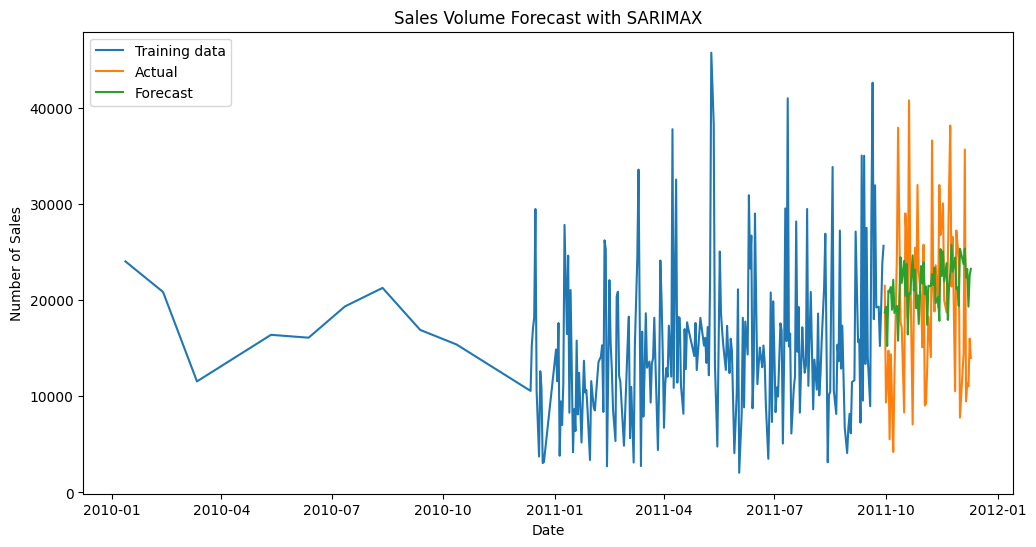

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

data= pd.read_csv("C:\\Users\\LAU\\Desktop\\new proj\\base_data_new_25_new.csv")
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='mixed', dayfirst=True)
# Extract date components
data['date'] = data['InvoiceDate'].dt.date
# Aggregate data by date
daily_data = data.groupby('date').agg({'Quantity': 'sum'}).reset_index()

# Set Date as the index
daily_data.set_index('date', inplace=True)

train_size = int(0.8 * len(daily_data))
train, test = daily_data.iloc[:train_size], daily_data.iloc[train_size:]

model = SARIMAX(train, order=(5,1,5),seasonal_order=(5,1,5,7))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training data')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.title('Sales Volume Forecast with SARIMAX')
plt.legend()
plt.show()


c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


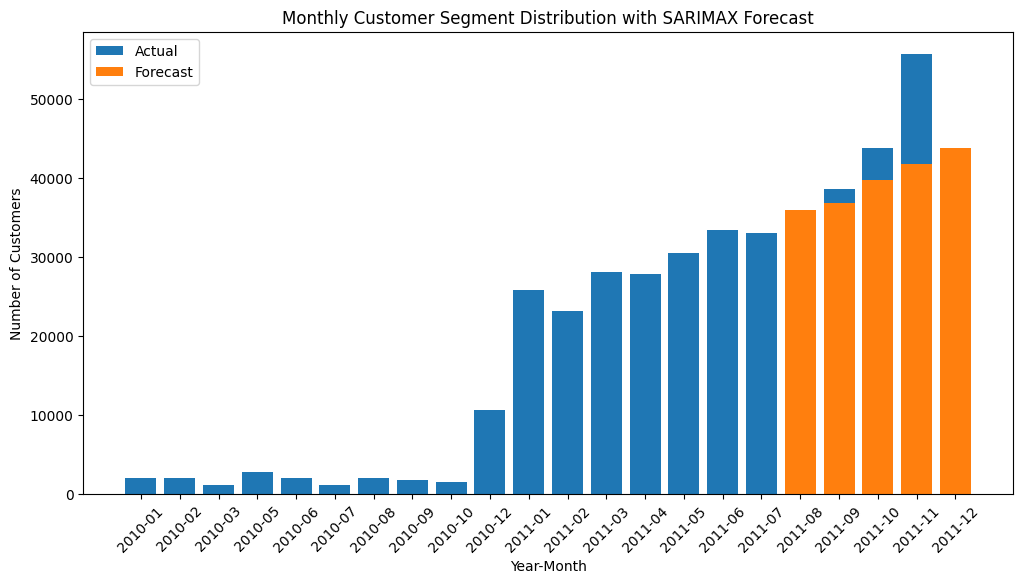

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
data= pd.read_csv("C:\\Users\\LAU\\Desktop\\new proj\\base_data_new_25_new.csv")
# Convert 'InvoiceDate' column to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='mixed', dayfirst=True)

data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

monthly_customers = data.groupby(['YearMonth', 'CustomerID']).size().reset_index(name='Count')

#  to get monthly customer segment distribution
monthly_segment_distribution = monthly_customers.groupby('YearMonth')['Count'].sum()

train_size = int(0.8 * len(monthly_segment_distribution))
train, test = monthly_segment_distribution.iloc[:train_size], monthly_segment_distribution.iloc[train_size:]

# Fit SARIMAX model
model = SARIMAX(train, order=(5,2,6))#seasonal_order=(1, 1, 1, 8)
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.bar(monthly_segment_distribution.index.astype(str), monthly_segment_distribution, label='Actual')
plt.bar(test.index.astype(str), forecast, label='Forecast')
plt.xlabel('Year-Month')
plt.ylabel('Number of Customers')
plt.title('Monthly Customer Segment Distribution with SARIMAX Forecast')
plt.xticks(rotation=45)
plt.legend()
plt.show()
